In [2]:
from collections.abc import Iterable
import matplotlib.pyplot as plt
import numpy as np
from sympy import *
from sympy.abc import x
from sympy.calculus.util import continuous_domain

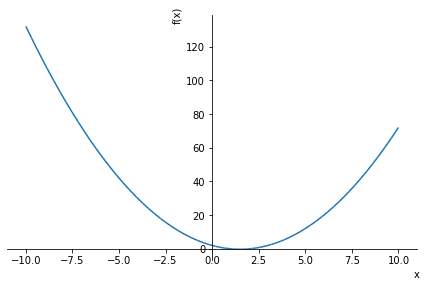

In [3]:
from typing import List

f = x**2 - 3*x + 2

g = {
    1: (x**2 + 2) / 3,
    2: sqrt(3*x - 2),
    3: 3 - 2 / x,
    4: (x**2 - 2) / (2*x -3)
}

plot(f)

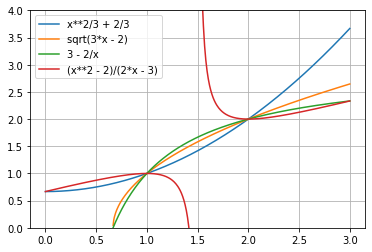

In [4]:
for g_i in g.values():
    x_v = np.linspace(0, 3, 500)
    gl = lambdify(x, g_i)

    inter = continuous_domain(g_i, x, S.Reals)
    #todo przeniesc to do jakiejs funckji
    not_in = S.Reals - inter

    if type(not_in) is FiniteSet:
        p = plt.plot([], [], label = g_i)
        for idk in not_in:
            n_x = x_v[x_v < idk]
            x_v = x_v[x_v > idk]

            plt.plot(n_x, gl(n_x), c=p[0].get_c())
        plt.plot(x_v, gl(x_v), c=p[0].get_c())
    else:
        x_v = np.array([x_i for x_i in x_v if x_i in inter])
        plt.plot(x_v, gl(x_v),label = g_i)

plt.ylim([0, 4])
plt.legend()
plt.grid()
plt.show()



In [27]:
for g_i in g.values():
    g_i_diff = diff(g_i, x)

    gld = lambdify(x, g_i_diff)
    print("{0:^20}".format(str(g_i)), gld(2))

    x**2/3 + 2/3     1.3333333333333333
   sqrt(3*x - 2)     0.75
      3 - 2/x        0.5
(x**2 - 2)/(2*x - 3) 0.0


In [58]:
def convergence(x_true, x_prev, x_v, gl):
    error = lambda x_v: abs(x_v - x_true)
    idk = lambda x1, x2: ln(error(x1)/error(x2))

    x_next = gl(x_v)
    try:
        res = idk(x_v, x_next)/idk(x_prev, x_v)
    except ZeroDivisionError:
        return float('inf')
    else:
        return res

def relative_error(x_val, x_true = 2):
    return abs((x_val - x_true) / x_true)

def iteration_scheme(g, n=10, print_steps = True, starting=3):
    x_v = starting
    print(g)
    gl = lambdify(x, g)
    relative_errors = [None] * n
    for i in range(n):
        x_prev = x_v
        x_v = gl(x_v)
        r = convergence(2, x_prev, x_v, gl)
        relative_errors[i] = relative_error(x_v, 2)
        if print_steps:
            print(x_v, r)
    return x_v, relative_errors
iteration_scheme(g[3])[0]

3 - 2/x
2.3333333333333335 0.771243749161423
2.142857142857143 0.899494838448679
2.0666666666666664 0.952498168064078
2.032258064516129 0.976871985587862
2.015873015873016 0.988584657508821
2.0078740157480315 0.994328667024472
2.003921568627451 0.997173317747369
2.0019569471624266 0.998588892580636
2.0009775171065494 0.999295003184911
2.0004885197850513 0.999647640625027


2.0004885197850513

sqrt(3*x - 2)
2.034098752854494
3 - 2/x
2.0004885197850513
(x**2 - 2)/(2*x - 3)
2.0


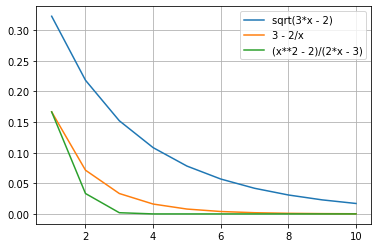

In [60]:
def plot_relative_errors(functions:dict, n=10):
    x_v = [i for i in range(1, n+1)]
    for g in list(functions.values())[1:]:
        res, errors = iteration_scheme(g, n=n, print_steps=False)
        print(res)
        plt.plot(x_v, errors, label=g)

    plt.legend()
    plt.grid()
    plt.show()

plot_relative_errors(g)

In [31]:
def newtons_method(f, n=10):
    fl = lambdify(x, f)
    f_diff = diff(f, x)
    fld = lambdify(x, f_diff)

    x_v = 1.51


    for i in range(n):

        x_v = x_v - fl(x_v)/fld(x_v)
        print(x_v)
    return x_v

fn = [
    x**3 - 2*x - 5,
    exp(-x)-x,
    x*sin(x)-1
]

newtons_method(fn[0])

2.455612668636242
2.151313671962719
2.0962857951806777
2.09455317252634
2.0945514815439363
2.0945514815423265
2.0945514815423265
2.0945514815423265
2.0945514815423265
2.0945514815423265


2.0945514815423265

In [194]:
def newtons_method_k_dimensions(f_list: List, n, symbols):
    def eval(matrix):
        return np.array(matrix.subs(x_v), dtype='float')
    f_matrix = Matrix(f_list)
    jacobian = f_matrix.jacobian(Matrix(list(symbols)))

    k = len(f_list)
    x_v = [(s, 1.51) for s in symbols]
    x_v = np.array(x_v)

    for i in range(n):
        s = np.linalg.solve(eval(jacobian), -eval(f_matrix))
        idk = x_v[:, 1].reshape(k, 1)
        idk += s
        print(x_v)

x1 = Symbol('x1')
x2 = Symbol('x2')

f1 = x1**2 + x2**2 - 1
f2 = x1**2 - x2**2

newtons_method_k_dimensions([f1, f2], 10, f1.free_symbols)

[[x2 0.9205629139072848]
 [x1 0.9205629139072847]]
[[x2 0.7318544219549014]
 [x1 0.7318544219549012]]
[[x2 0.7075252016436949]
 [x1 0.7075252016436949]]
[[x2 0.7071069049105354]
 [x1 0.7071069049105354]]
[[x2 0.7071067811865583]
 [x1 0.7071067811865583]]
[[x2 0.7071067811865475]
 [x1 0.7071067811865475]]
[[x2 0.7071067811865476]
 [x1 0.7071067811865476]]
[[x2 0.7071067811865475]
 [x1 0.7071067811865475]]
[[x2 0.7071067811865476]
 [x1 0.7071067811865476]]
[[x2 0.7071067811865475]
 [x1 0.7071067811865475]]
